In [9]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
df_class = pd.read_csv("classData.csv")

In [11]:
df_class

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983
...,...,...,...,...,...,...,...,...,...,...
7856,0,0,0,0,-66.237921,38.457041,24.912239,0.094421,-0.552019,0.457598
7857,0,0,0,0,-65.849493,37.465454,25.515675,0.103778,-0.555186,0.451407
7858,0,0,0,0,-65.446698,36.472055,26.106554,0.113107,-0.558211,0.445104
7859,0,0,0,0,-65.029633,35.477088,26.684731,0.122404,-0.561094,0.438690


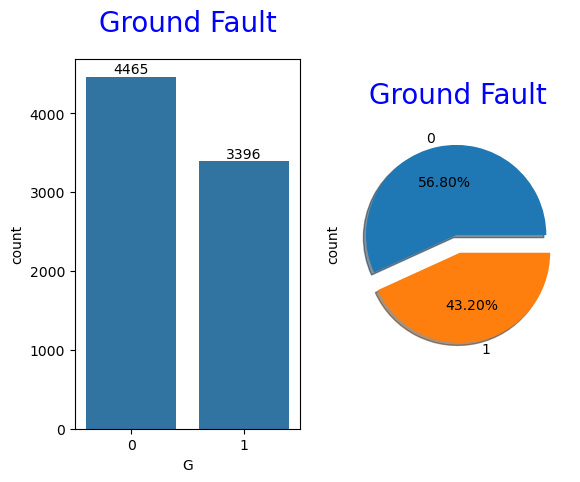

In [12]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='G', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Ground Fault", fontsize=20,color = 'Blue',pad=20)

ax = plt.subplot(1,2,2)
ax = df_class['G'].value_counts().plot.pie(explode=[0.1, 0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label="Ground Fault", fontsize=20, color='Blue', pad=20);

Text(0.5, 1.0, 'Line A fault')

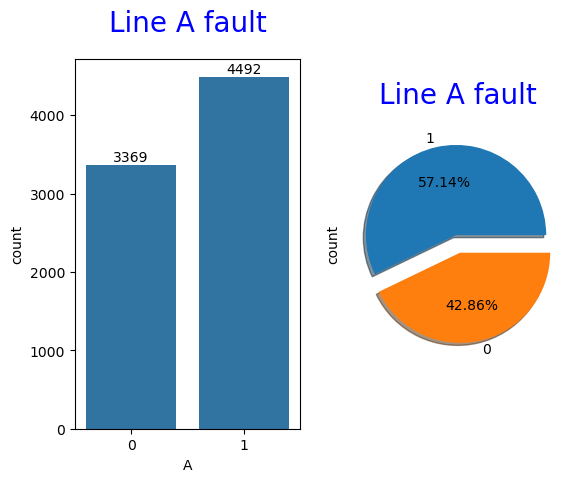

In [13]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='A', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line A fault", fontsize=20, color="Blue", pad=20)

ax = plt.subplot(1,2,2)
ax = df_class['A'].value_counts().plot.pie(explode=[0.1,0.1],autopct='%1.2f%%',shadow=True);
ax.set_title(label="Line A fault", fontsize=20, color='Blue', pad=20)

Text(0.5, 1.0, 'Line B fault')

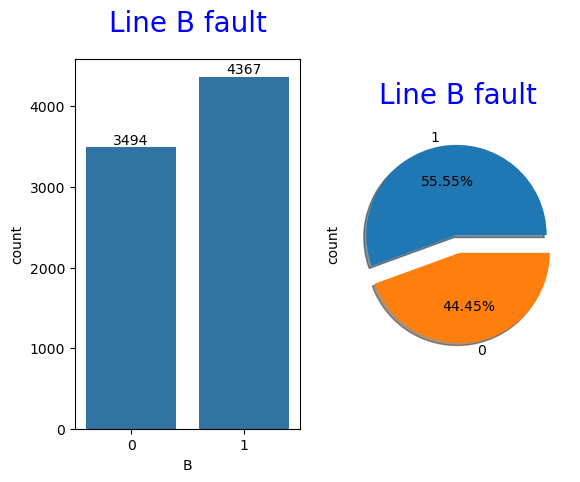

In [14]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='B', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line B fault", fontsize=20, color='Blue', pad=20)

ax = plt.subplot(1,2,2)
ax = df_class['B'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.2f%%', shadow=True);
ax.set_title(label="Line B fault", fontsize=20, color='Blue', pad=20)

Text(0.5, 1.0, 'Line C fault')

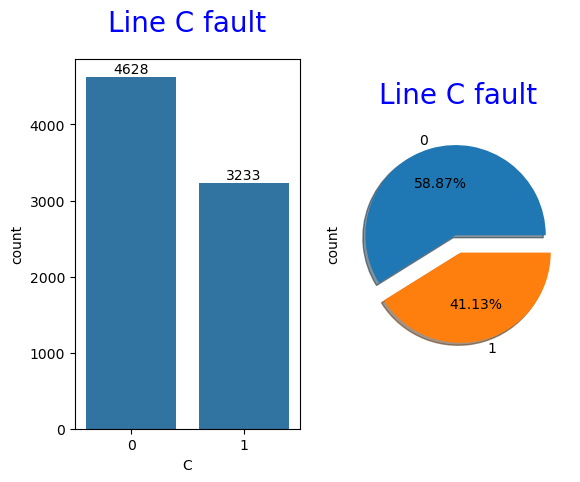

In [15]:
ax = plt.subplot(1,2,1)
ax = sns.countplot(x='C', data=df_class)
ax.bar_label(ax.containers[0])
plt.title("Line C fault", fontsize=20, color='Blue', pad=20)

ax = plt.subplot(1,2,2)
ax = df_class['C'].value_counts().plot.pie(explode=[0.1,0.1], autopct='%1.2f%%', shadow=True); 
ax.set_title(label="Line C fault", fontsize=20, color='Blue', pad=20)

**Combining them into str format**

In [16]:
df_class['Fault_Type'] = df_class['G'].astype('str') + df_class['C'].astype('str') + df_class['B'].astype('str') + df_class['A'].astype('str')
df_class.sample(6)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3093,0,1,1,0,55.377917,-230.995547,178.204047,0.405532,0.041260,-0.446793,0110
4529,1,1,1,1,399.044350,-893.062476,494.044194,-0.024202,-0.017734,0.041936,1111
273,1,0,0,1,738.622687,18.265830,28.509056,0.155290,-0.484075,0.328785,1001
925,1,0,0,1,-158.642507,37.353259,-49.396473,-0.361306,0.597027,-0.235722,1001
3877,0,1,1,1,807.301129,-715.188185,-90.046513,0.002601,-0.037891,0.035290,0111
5822,0,0,0,0,-72.032340,75.802456,-7.242108,-0.226660,-0.363971,0.590631,0000


**Giving Proper Name to the fault according to the description provided**

In [17]:
df_class['Fault_Type'][df_class['Fault_Type'] == '0000' ] = 'No Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0110' ] = 'Line B to Line C Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '1011' ] = 'Line A Line B to Ground Fault'
df_class['Fault_Type'][df_class['Fault_Type'] == '0111' ] = 'Line A Line B Line C'
df_class['Fault_Type'][df_class['Fault_Type'] == '1111' ] = 'Line A Line B Line C to Ground Fault'

/tmp/ipykernel_179054/1323056620.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['Fault_Type'][df_class['Fault_Type'] == '0000' ] = 'No Fault'
/tmp/ipykernel_179054/1323056620.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['Fault_Type'][df_class['Fault_Type'] == '1001' ] = 'Line A to Ground Fault'
/tmp/ipykernel_179054/1323056620.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_class['Fault_Type'][df_cl

In [18]:
df_class.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
6882,0,0,0,0,35.818373,50.400607,-89.369106,-0.347962,0.624329,-0.276367,No Fault
4307,0,1,1,1,653.208495,-631.911668,-19.193211,0.021507,-0.404377,0.382870,Line A Line B Line C
221,1,0,0,1,853.904955,62.350820,-10.374818,-0.148643,-0.065717,0.214360,Line A to Ground Fault
7842,0,0,0,0,-70.120237,52.013561,15.234174,-0.038279,-0.493339,0.531617,No Fault
6676,0,0,0,0,-56.797761,22.233388,31.351262,0.272075,-0.585642,0.313567,No Fault


In [19]:
df_class.describe().round(3)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000,7861.000
mean,0.432,0.411,0.556,0.571,13.721,-44.845,34.392,-0.008,0.001,0.007
std,0.495,0.492,0.497,0.495,464.742,439.269,371.107,0.289,0.313,0.308
min,0.000,0.000,0.000,0.000,-883.542,-900.527,-883.358,-0.621,-0.608,-0.613
25%,0.000,0.000,0.000,0.000,-119.803,-271.846,-61.034,-0.130,-0.160,-0.216
50%,0.000,0.000,1.000,1.000,2.043,5.513,-4.327,-0.005,0.002,0.009
75%,1.000,1.000,1.000,1.000,227.246,91.194,49.115,0.112,0.154,0.240
max,1.000,1.000,1.000,1.000,885.739,889.869,901.274,0.595,0.628,0.600


In [20]:
df_class['Fault_Type'].value_counts(ascending=False)

Fault_Type
No Fault                                2365
Line A Line B to Ground Fault           1134
Line A Line B Line C to Ground Fault    1133
Line A to Ground Fault                  1129
Line A Line B Line C                    1096
Line B to Line C Fault                  1004
Name: count, dtype: int64

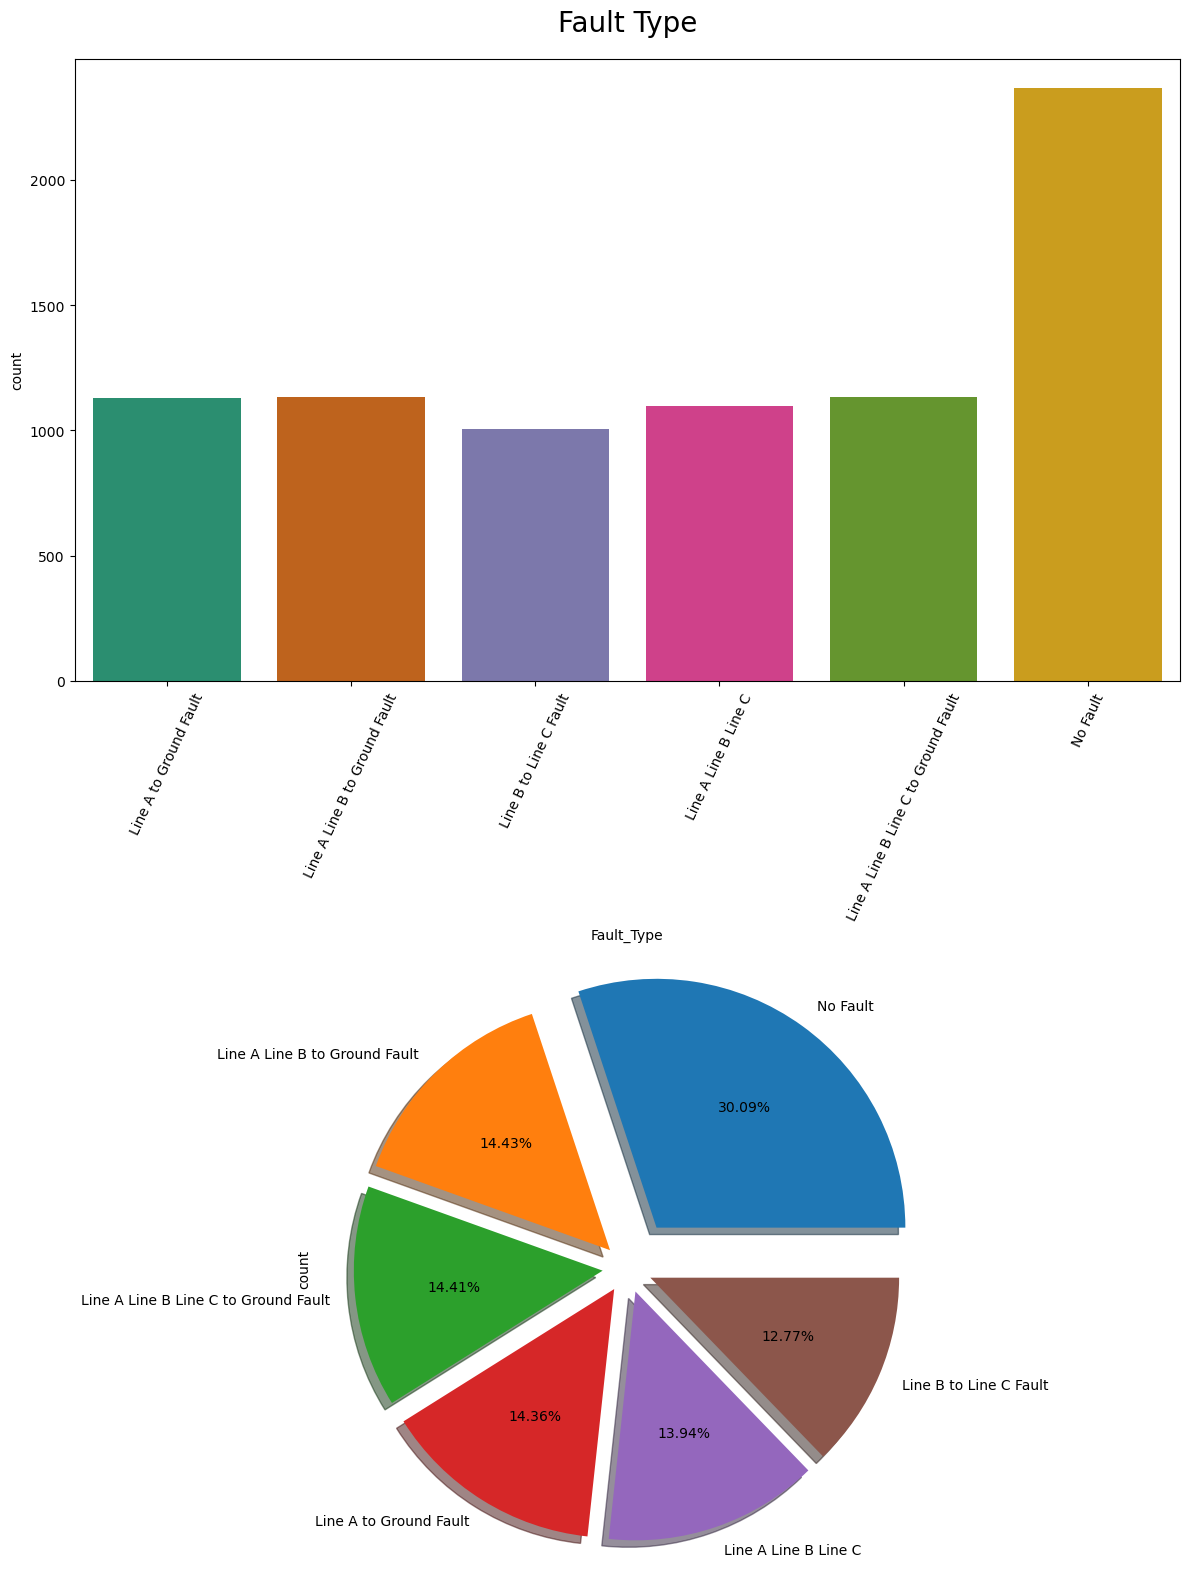

In [21]:
ax = plt.figure(figsize=(12, 16))
ax = plt.subplot(2,1,1)
ax = sns.countplot(data=df_class, x='Fault_Type', hue='Fault_Type', palette='Dark2')
plt.title("Fault Type", fontsize=20, color='Black', pad=20)
plt.xticks(rotation=65)
plt.tight_layout()

ax = plt.subplot(2,1,2)
ax = df_class['Fault_Type'].value_counts().plot.pie(explode=[0.2,0.1,0.1,0.1,0.1,0.1], autopct='%1.2f%%', shadow=True); 
plt.tight_layout()

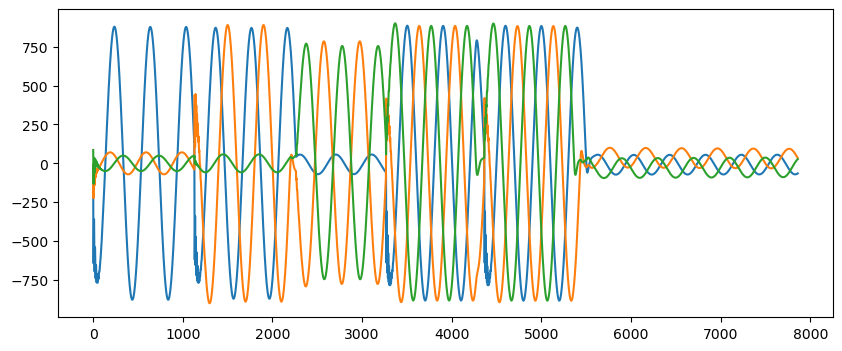

In [22]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Ia"])
plt.plot(df_class["Ib"])
plt.plot(df_class["Ic"]);

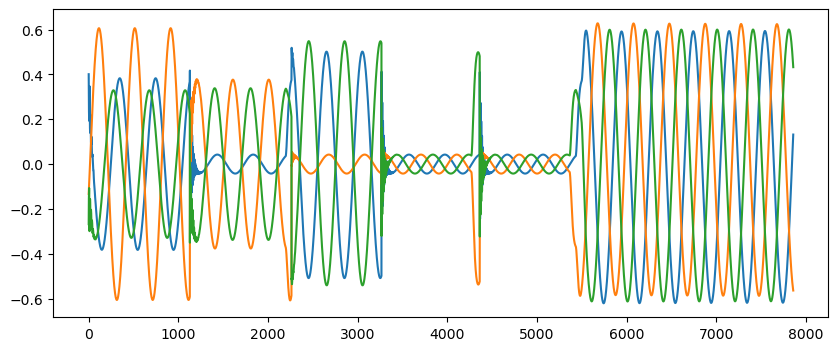

In [23]:
plt.figure(figsize = (10,4))
plt.plot(df_class["Va"])
plt.plot(df_class["Vb"])
plt.plot(df_class["Vc"]);

**Where there is large fluctuation in graph, there faults have occured**

<Axes: xlabel='Ic'>

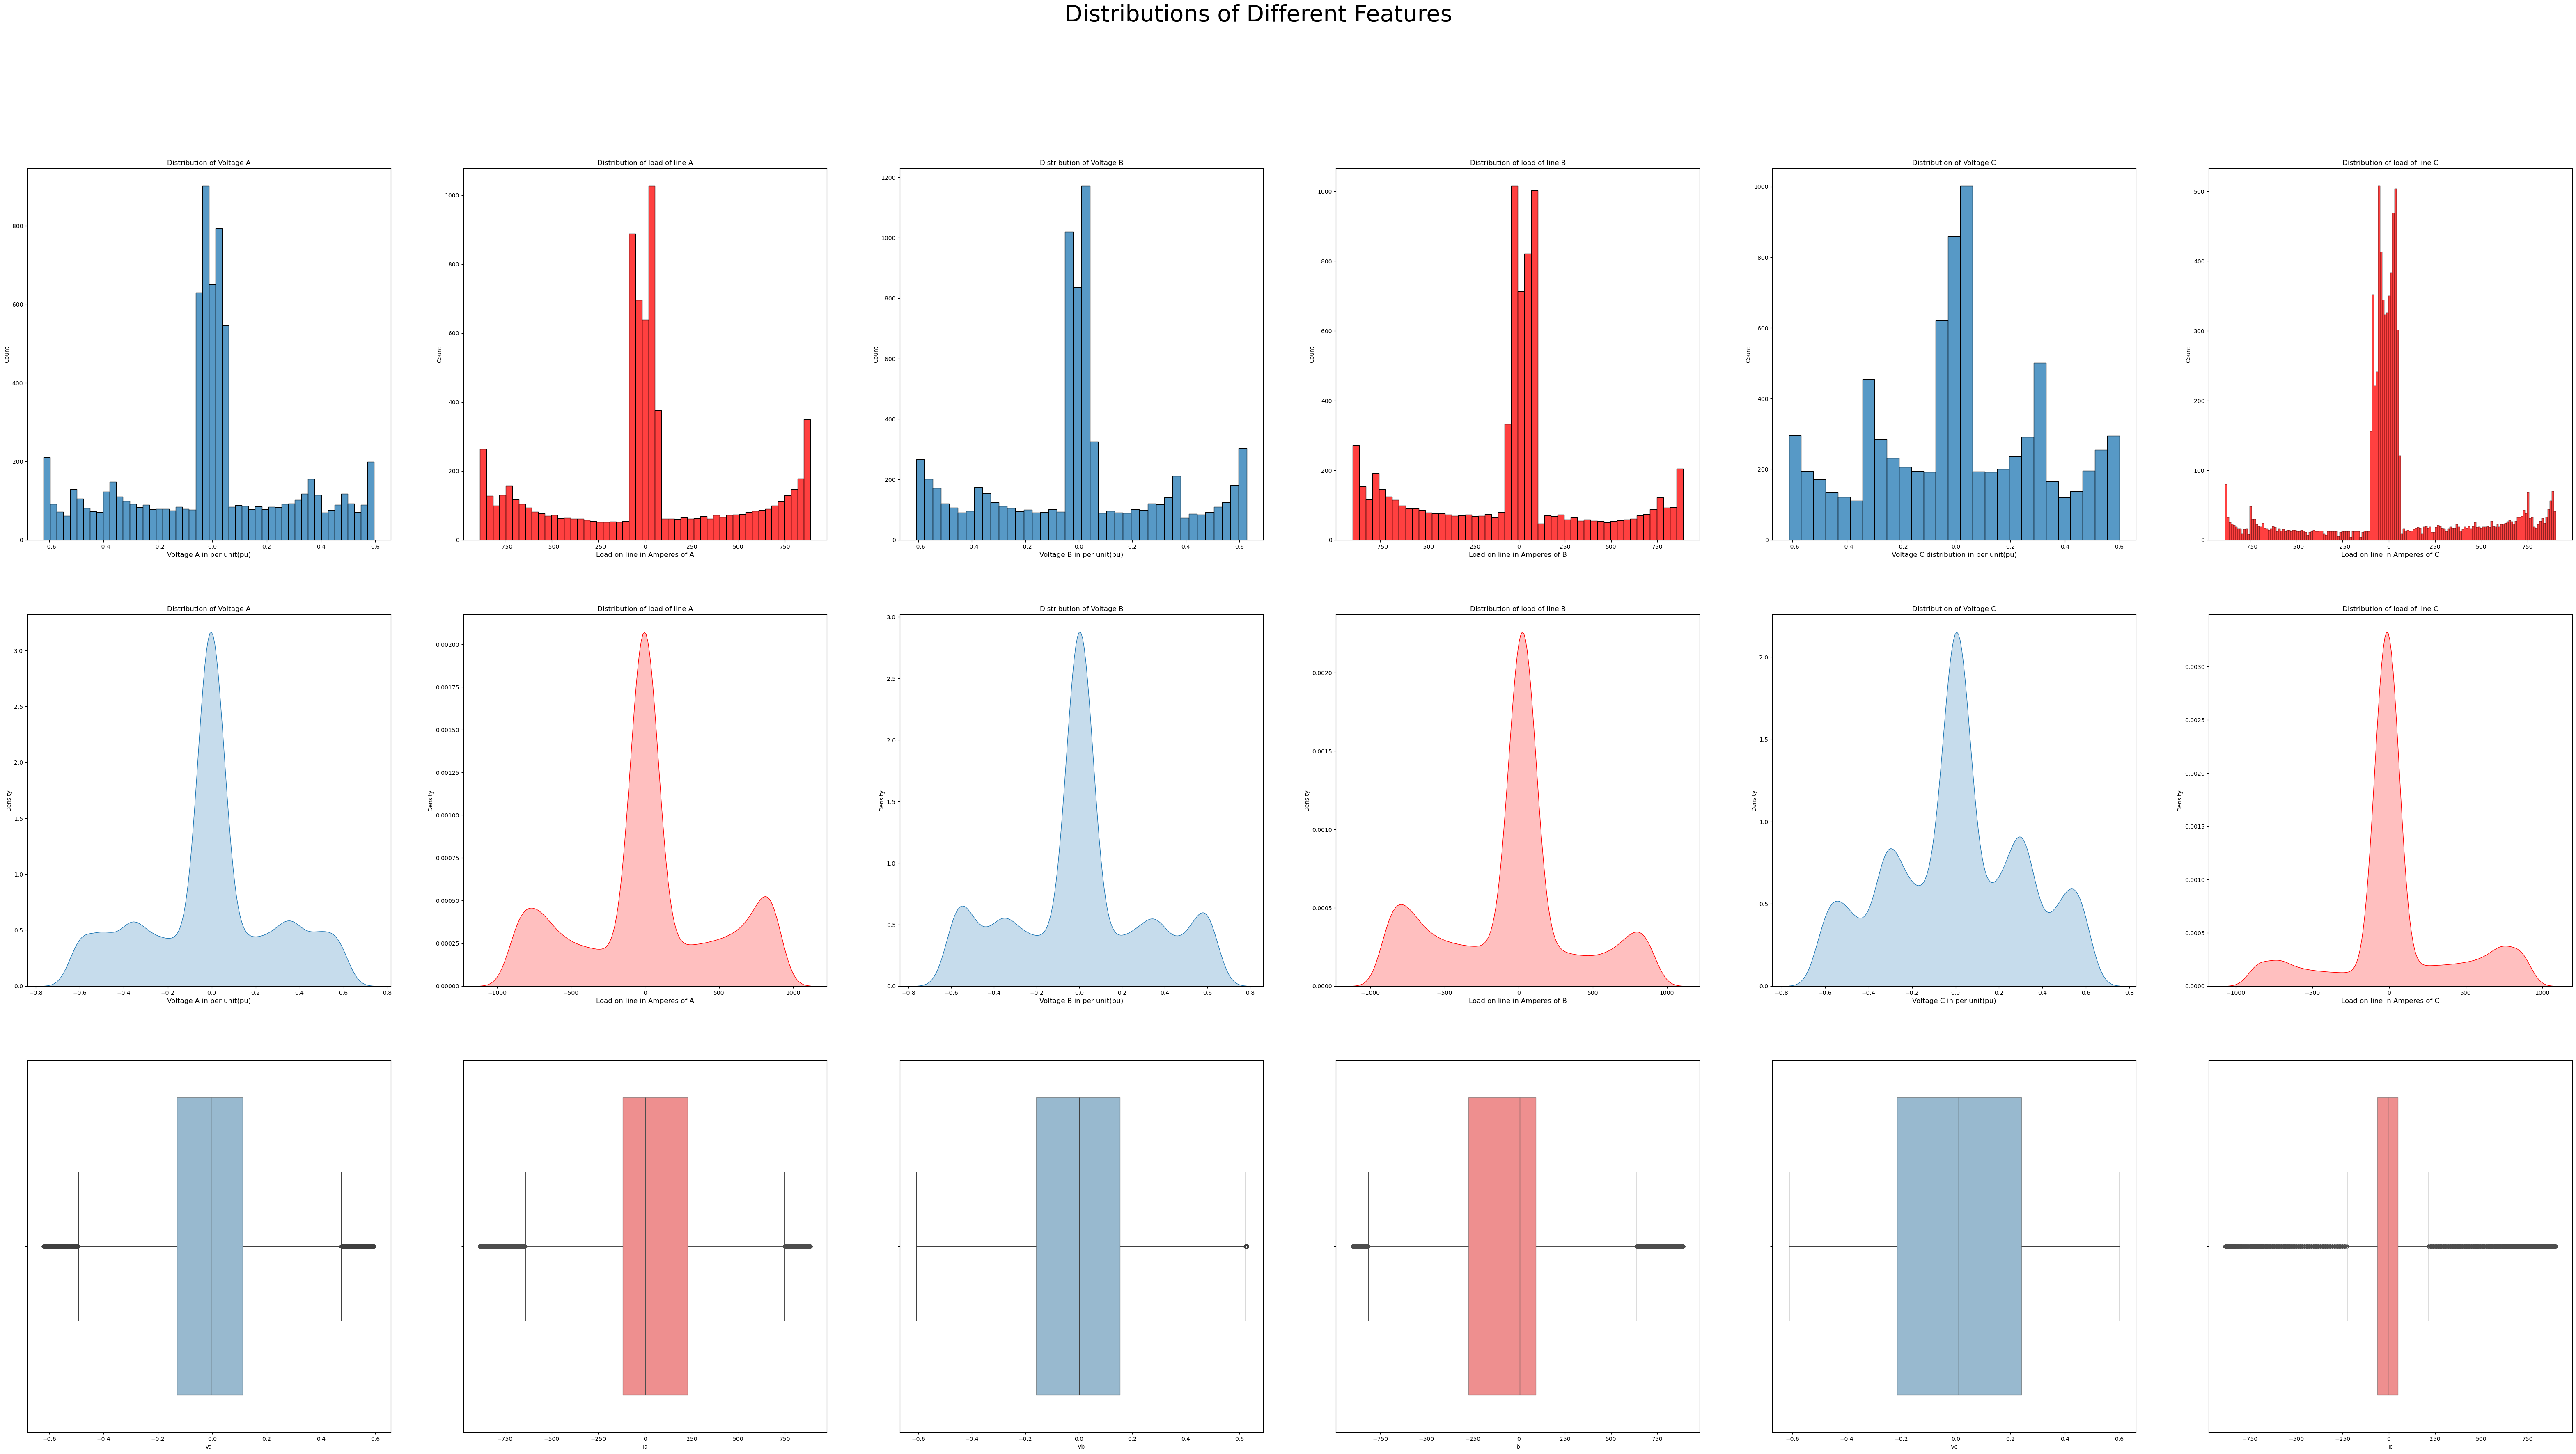

In [24]:
plt.figure(figsize=(80,40))
plt.suptitle("Distributions of Different Features", fontsize=40)

# Histograms
plt.subplot(3,6,1) #Va
sns.histplot(df_class['Va']) 
plt.xlabel('Voltage A in per unit(pu)', fontsize=12)
plt.title('Distribution of Voltage A', fontsize=12)

plt.subplot(3,6,2) #Ia
sns.histplot(df_class['Ia'], color='red', kde=False)
plt.xlabel('Load on line in Amperes of A', fontsize=12)
plt.title('Distribution of load of line A', fontsize=12)

plt.subplot(3,6,3) #Vb
sns.histplot(df_class['Vb'])
plt.xlabel('Voltage B in per unit(pu)', fontsize=12)
plt.title('Distribution of Voltage B', fontsize=12)

plt.subplot(3,6,4) #Ib
sns.histplot(df_class['Ib'], color='red', kde=False)
plt.xlabel('Load on line in Amperes of B', fontsize=12)
plt.title('Distribution of load of line B', fontsize=12)

plt.subplot(3,6,5) #Vc
sns.histplot(df_class['Vc'])
plt.xlabel('Voltage C distribution in per unit(pu)', fontsize=12)
plt.title('Distribution of Voltage C', fontsize=12)

plt.subplot(3,6,6) #Ic
sns.histplot(df_class['Ic'], color='red', kde=False)
plt.xlabel('Load on line in Amperes of C', fontsize=12)
plt.title('Distribution of load of line C', fontsize=12)

# Kde Plots
plt.subplot(3,6,7) #Va
sns.kdeplot(df_class['Va'], fill=True) 
plt.xlabel('Voltage A in per unit(pu)', fontsize=12)
plt.title('Distribution of Voltage A', fontsize=12)

plt.subplot(3,6,8) #Ia
sns.kdeplot(df_class['Ia'], color='red', fill=True)
plt.xlabel('Load on line in Amperes of A', fontsize=12)
plt.title('Distribution of load of line A', fontsize=12)

plt.subplot(3,6,9) #Vb
sns.kdeplot(df_class['Vb'], fill=True)
plt.xlabel('Voltage B in per unit(pu)', fontsize=12)
plt.title('Distribution of Voltage B', fontsize=12)

plt.subplot(3,6,10) #Ib
sns.kdeplot(df_class['Ib'], color='red', fill=True)
plt.xlabel('Load on line in Amperes of B', fontsize=12)
plt.title('Distribution of load of line B', fontsize=12)

plt.subplot(3,6,11) #Vc
sns.kdeplot(df_class['Vc'], fill=True)
plt.xlabel('Voltage C in per unit(pu)', fontsize=12)
plt.title('Distribution of Voltage C', fontsize=12)

plt.subplot(3,6,12) #Ic
sns.kdeplot(df_class['Ic'], color='red', fill=True)
plt.xlabel('Load on line in Amperes of C', fontsize=12)
plt.title('Distribution of load of line C', fontsize=12)

# Box Plots

plt.subplot(3,6,13) #Va
sns.boxplot(x=df_class['Va'], orientation='v', boxprops=dict(alpha=0.5))

plt.subplot(3,6,14) #Ia
sns.boxplot(x=df_class['Ia'], orientation='v', color='r', boxprops=dict(alpha=0.5))

plt.subplot(3,6,15) #Vb
sns.boxplot(x=df_class['Vb'], orientation='v', boxprops=dict(alpha=0.5))

plt.subplot(3,6,16) #Ib
sns.boxplot(x=df_class['Ib'], orientation='v', color='r', boxprops=dict(alpha=0.5))

plt.subplot(3,6,17) #Vc
sns.boxplot(x=df_class['Vc'], orientation='v', boxprops=dict(alpha=0.5))

plt.subplot(3,6,18) #Ic
sns.boxplot(x=df_class['Ic'], orientation='v', color='r', boxprops=dict(alpha=0.5))

#### 1. No Fault(Healthy Systems)

In [25]:
No_Fault = df_class[df_class['Fault_Type'] == 'No Fault']
No_Fault.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7299,0,0,0,0,22.571553,64.588911,-90.186846,-0.468863,0.592292,-0.123428,No Fault
6487,0,0,0,0,31.787984,56.413616,-91.473606,-0.387075,0.620297,-0.233222,No Fault
7671,0,0,0,0,43.595628,37.237910,-83.753636,-0.255165,0.620304,-0.365139,No Fault
6928,0,0,0,0,-5.282462,86.277517,-84.131286,-0.598311,0.448470,0.149840,No Fault
5733,0,0,0,0,-11.131462,92.792918,-85.039566,-0.610483,0.415944,0.194539,No Fault


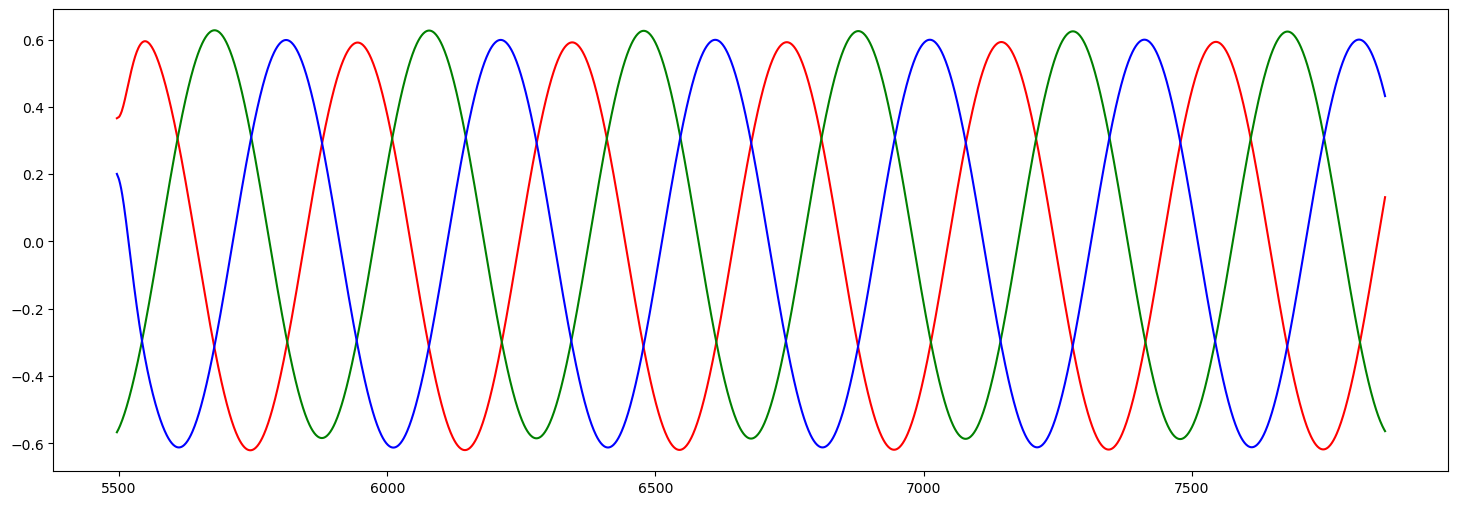

In [26]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(No_Fault['Va'], 'r')
ax = plt.plot(No_Fault['Vb'], 'g')
ax = plt.plot(No_Fault['Vc'], 'b')

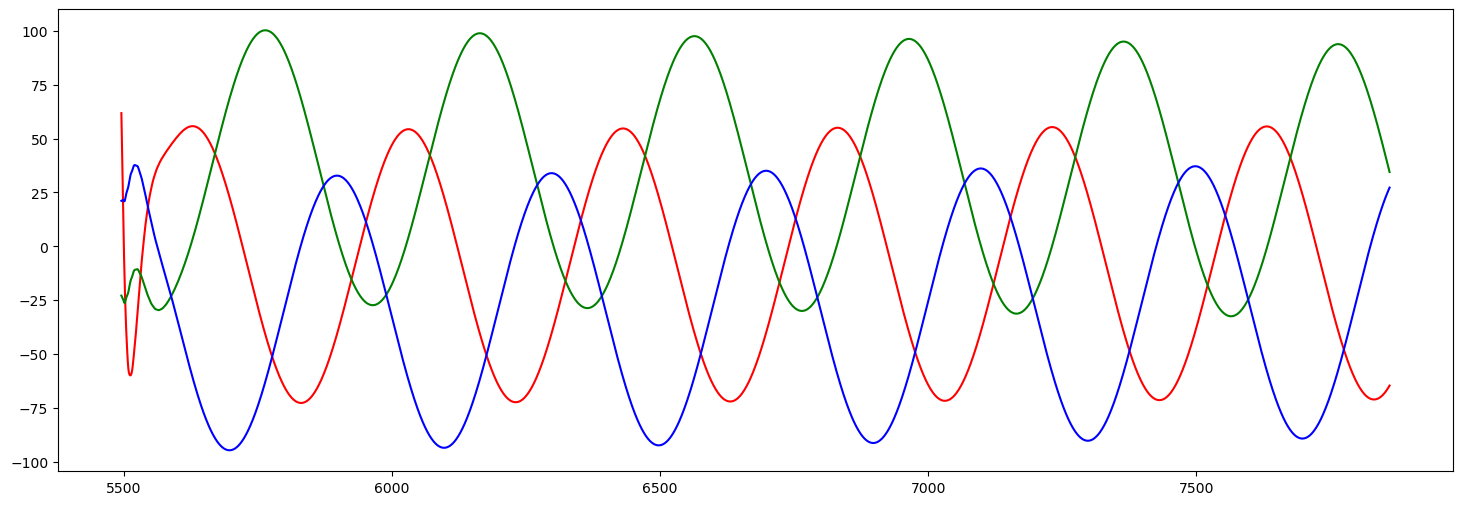

In [27]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(No_Fault['Ia'], 'r')
ax = plt.plot(No_Fault['Ib'], 'g')
ax = plt.plot(No_Fault['Ic'], 'b')

In a normal (No_Fault) condition Voltage or Current graph, is symmetrical and sinusoidal in nature with current and voltage 120 degree in phase shift and maximum current is approximately +100 to -100 Amperes and voltage +0.5 pu to -0.5pu

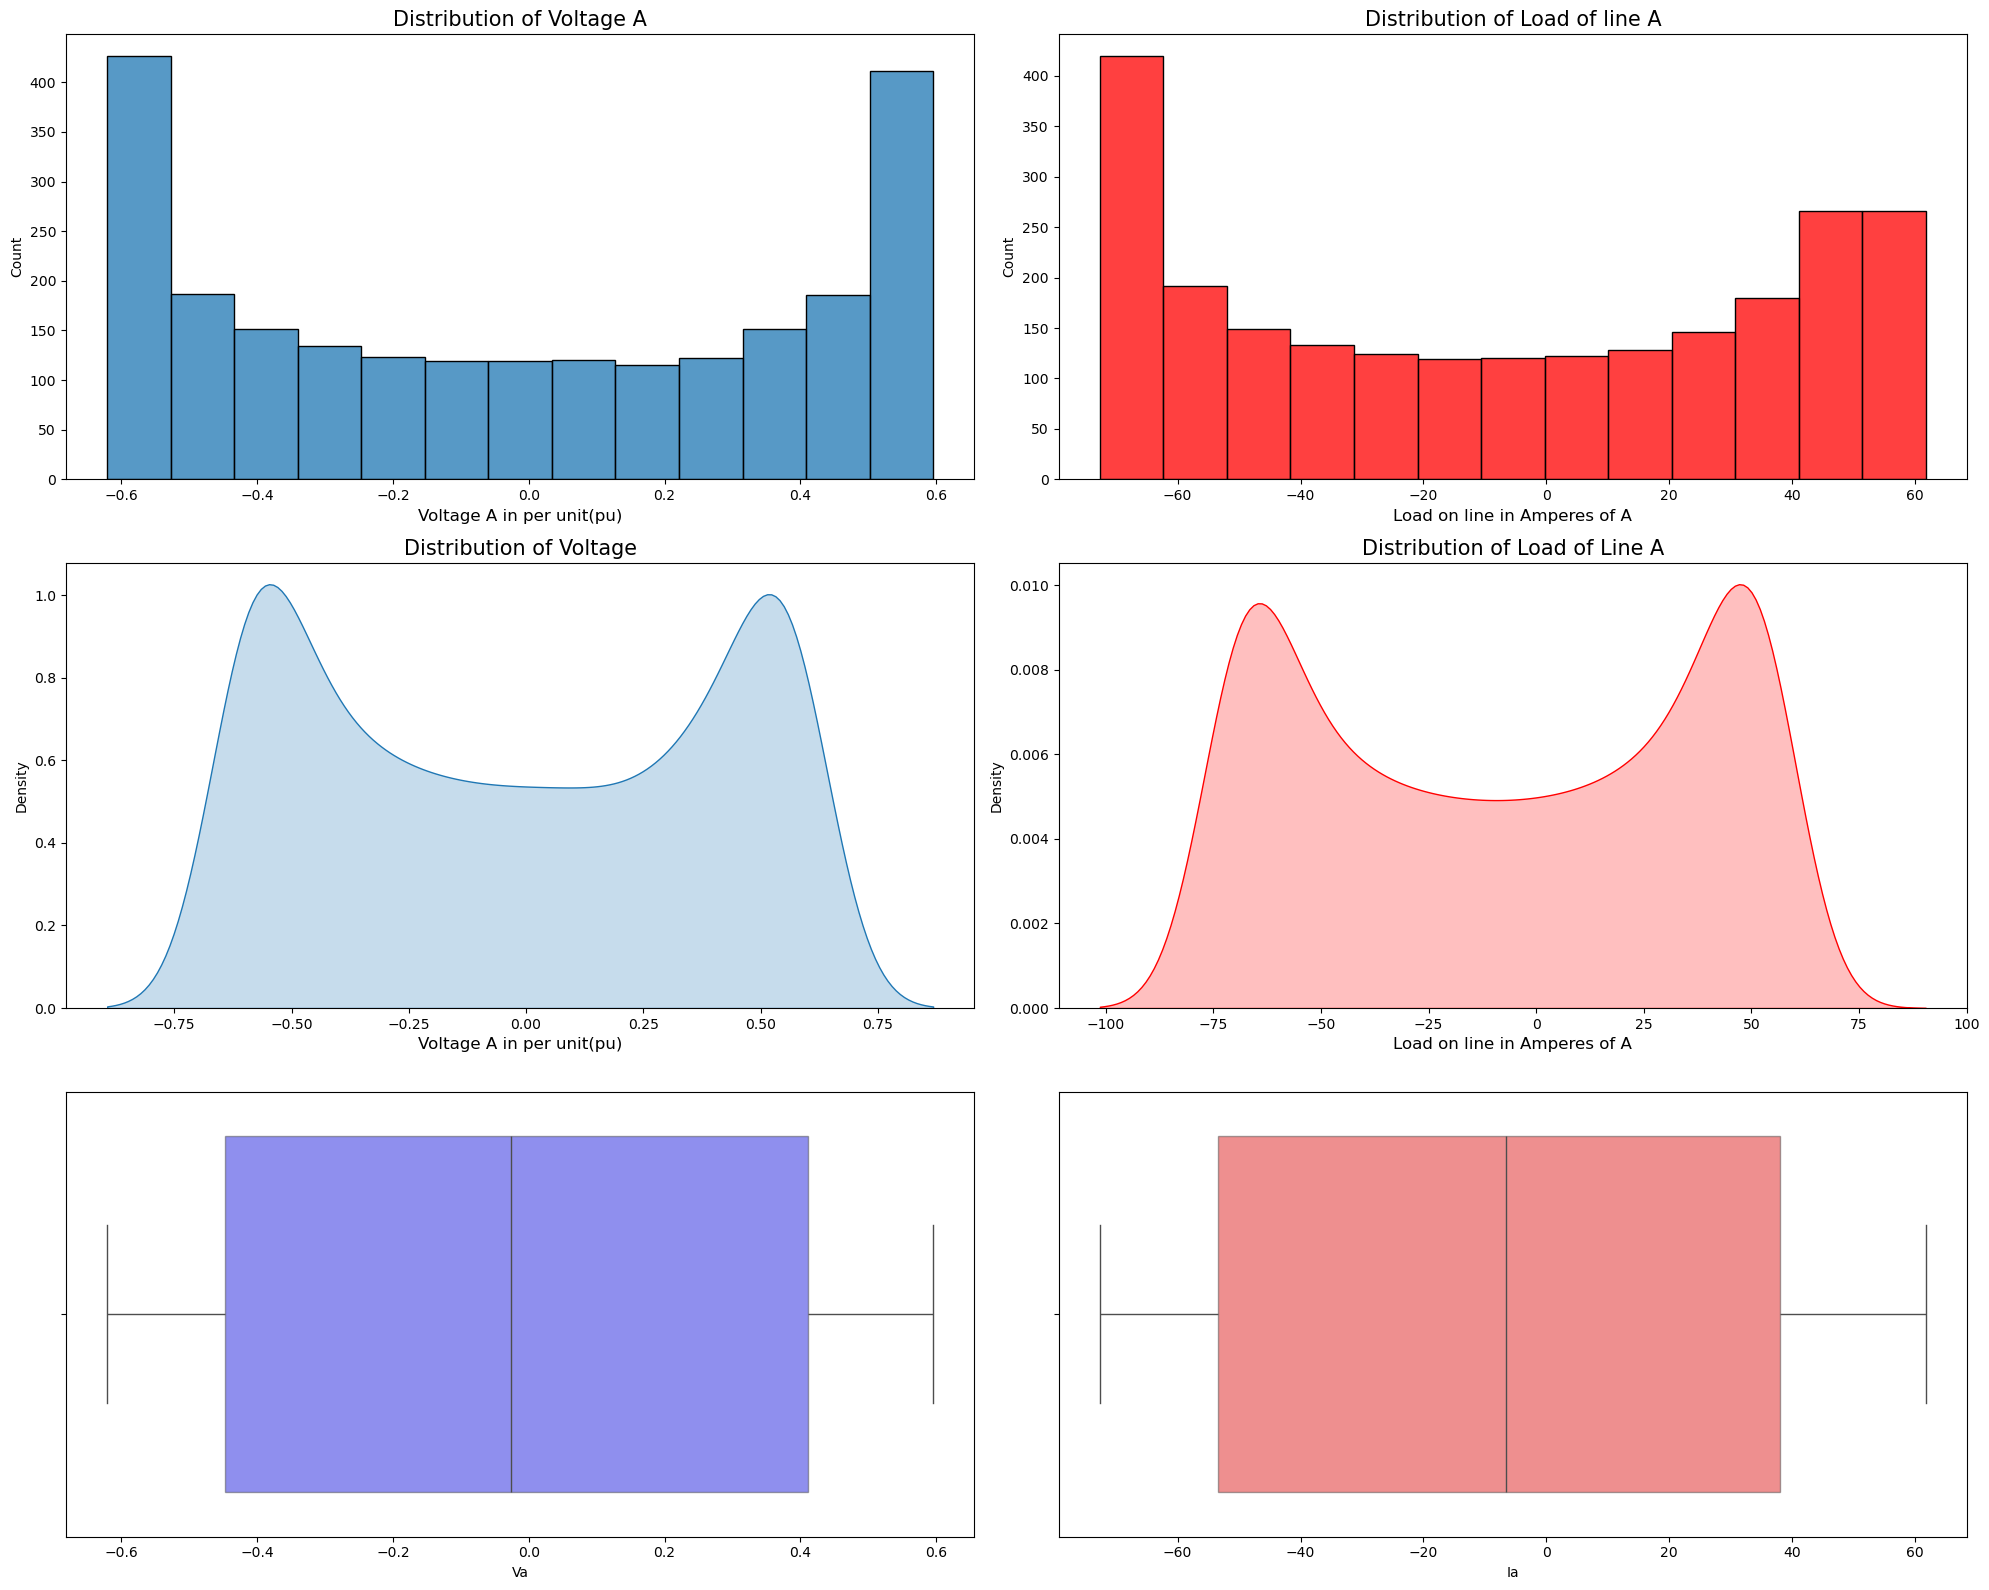

In [28]:
plt.figure(figsize=(20,16))
# plt.suptitle("Distributions of Different Features", fontsize=15)

# Histograms
plt.subplot(3,2,1)
sns.histplot(No_Fault['Va'])
plt.xlabel('Voltage A in per unit(pu)', fontsize=12)
plt.title('Distribution of Voltage A', fontsize=15)

plt.subplot(3,2,2)
sns.histplot(No_Fault['Ia'], color='red')
plt.xlabel('Load on line in Amperes of A', fontsize=12)
plt.title('Distribution of Load of line A', fontsize=15)

# Kde Plots
plt.subplot(3,2,3)
sns.kdeplot(No_Fault['Va'], fill=True)
plt.xlabel('Voltage A in per unit(pu)', fontsize=12)
plt.title('Distribution of Voltage', fontsize=15)

plt.subplot(3,2,4)
sns.kdeplot(No_Fault['Ia'], color='r', fill=True)
plt.xlabel('Load on line in Amperes of A', fontsize=12)
plt.title('Distribution of Load of Line A', fontsize=15)

# Box plots
plt.subplot(3,2,5)
sns.boxplot(x=No_Fault['Va'], orientation='v', color='b', boxprops=dict(alpha=.5))
plt.subplot(3,2,6)
sns.boxplot(x=No_Fault['Ia'], orientation='v', color='r', boxprops=dict(alpha=.5))



plt.tight_layout()
plt.show()

****

#### 2. Faulty System with Line A to Ground Fault

In [29]:
Line_AG_Fault = df_class[df_class['Fault_Type'] == 'Line A to Ground Fault']

In [30]:
Line_AG_Fault.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
354,1,0,0,1,-237.286985,-59.997410,47.562978,0.380039,-0.490653,0.110614,Line A to Ground Fault
22,1,0,0,1,-576.131384,-42.949787,28.473209,0.177478,0.075170,-0.252648,Line A to Ground Fault
79,1,0,0,1,-630.785664,-12.399461,-32.891419,-0.183819,0.516222,-0.332403,Line A to Ground Fault
892,1,0,0,1,-565.574231,2.653224,-39.300737,-0.251261,0.569832,-0.318570,Line A to Ground Fault
164,1,0,0,1,374.833346,65.058355,-44.677902,-0.367839,0.428997,-0.061158,Line A to Ground Fault


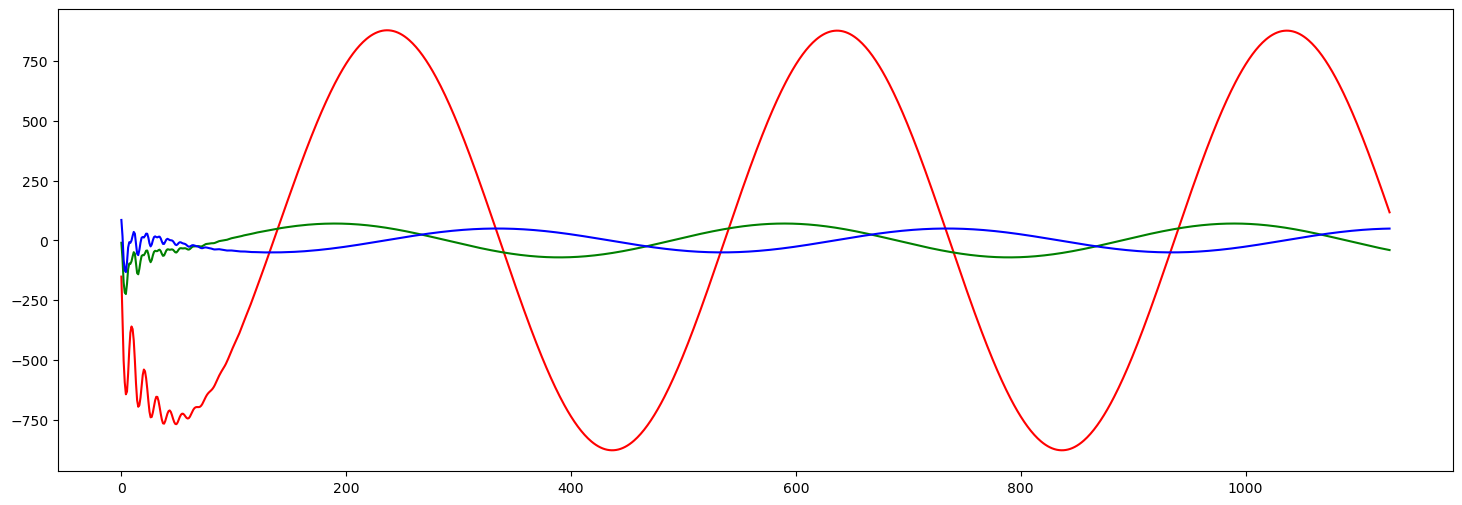

In [31]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_AG_Fault['Ia'], 'r')
ax = plt.plot(Line_AG_Fault['Ib'], 'g')
ax = plt.plot(Line_AG_Fault['Ic'], 'b')

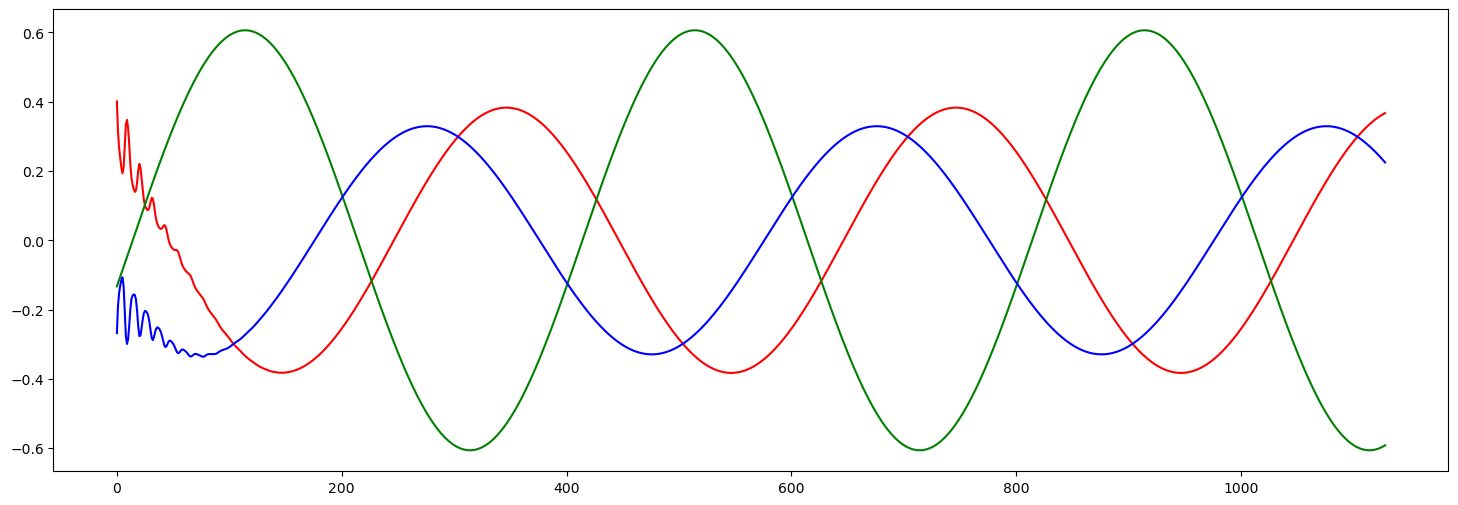

In [32]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_AG_Fault['Va'], 'r')
ax = plt.plot(Line_AG_Fault['Vb'], 'g')
ax = plt.plot(Line_AG_Fault['Vc'], 'b')

At a time of Line A to grounf fault the current in line A increases to 10 fold approximately 1000 Ampears form normal 100 Ampears and voltage reduced.

#### 3. Faulty System with Line A, Line B to Ground Fault

In [33]:
Line_ABG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B to Ground Fault']

In [34]:
Line_ABG_Fault.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
2009,1,0,1,1,-678.077505,-127.244972,-45.730356,-0.038861,0.376540,-0.337679,Line A Line B to Ground Fault
1313,1,0,1,1,593.244913,-878.784223,-32.380244,-0.013931,-0.025752,0.039683,Line A Line B to Ground Fault
1929,1,0,1,1,-729.810706,798.311282,19.460798,0.004020,0.118090,-0.122109,Line A Line B to Ground Fault
1549,1,0,1,1,-841.120269,637.712476,1.695232,-0.009205,0.222796,-0.213592,Line A Line B to Ground Fault
1974,1,0,1,1,-863.992208,351.697118,-20.536375,-0.024327,0.322004,-0.297676,Line A Line B to Ground Fault


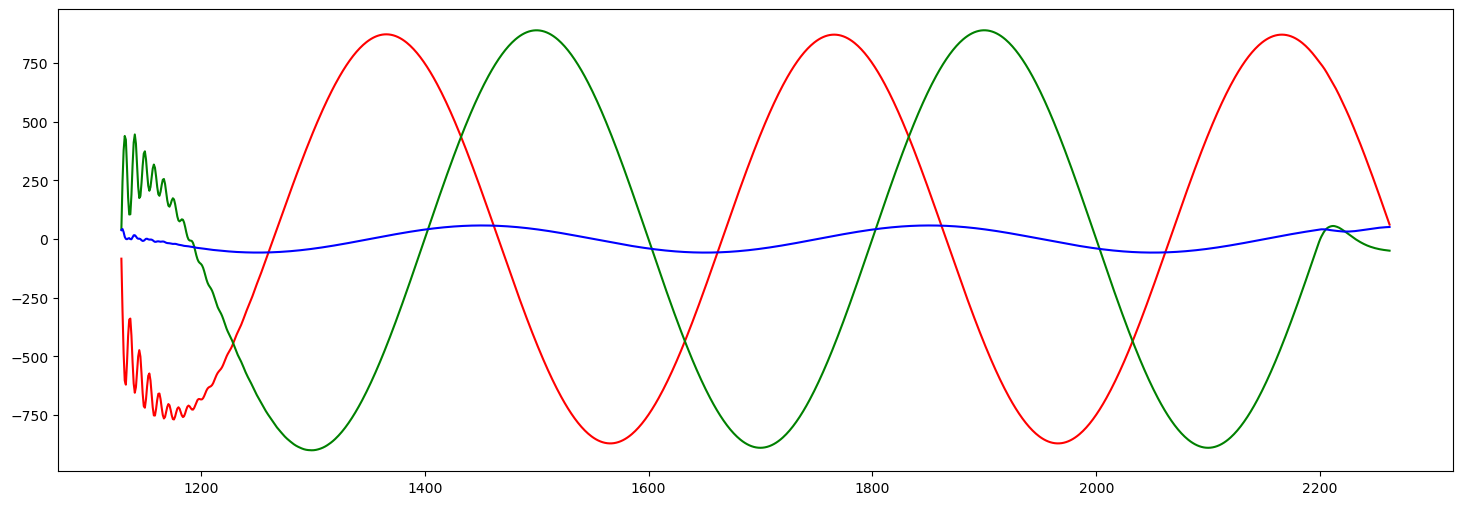

In [35]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_ABG_Fault['Ia'], 'r')
ax = plt.plot(Line_ABG_Fault['Ib'], 'g')
ax = plt.plot(Line_ABG_Fault['Ic'], 'b')

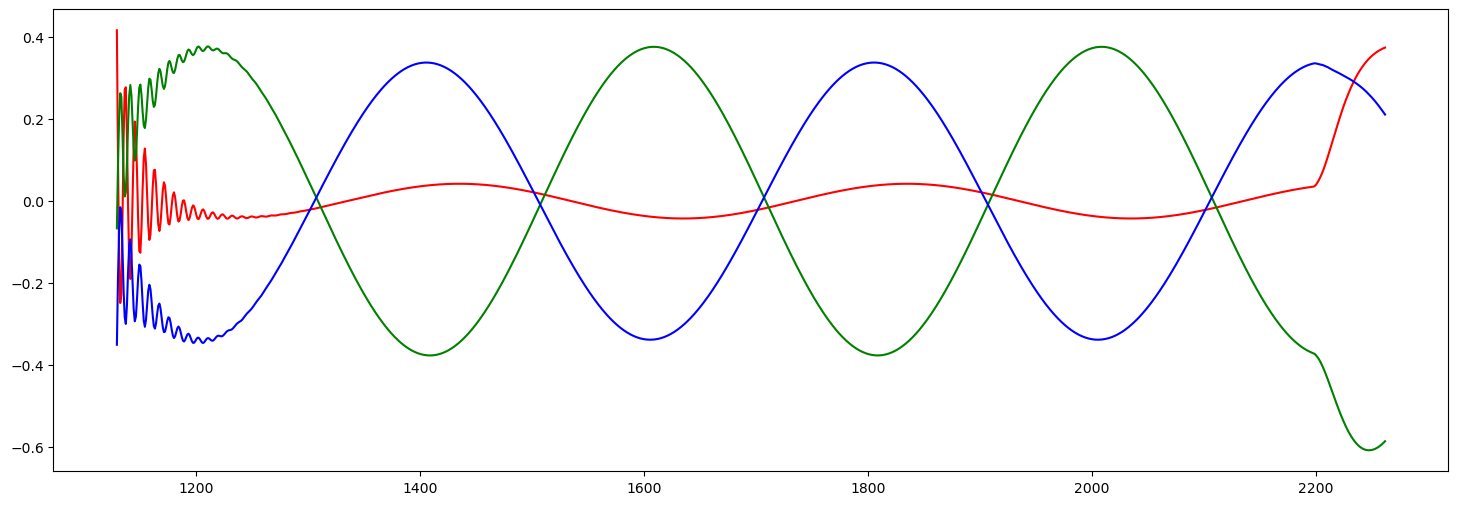

In [36]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_ABG_Fault['Va'], 'r')
ax = plt.plot(Line_ABG_Fault['Vb'], 'g')
ax = plt.plot(Line_ABG_Fault['Vc'], 'b')

#### 4.Faulty System with Line B to Line C

In [37]:
Line_BC_Fault = df_class[df_class['Fault_Type'] == 'Line B to Line C Fault']

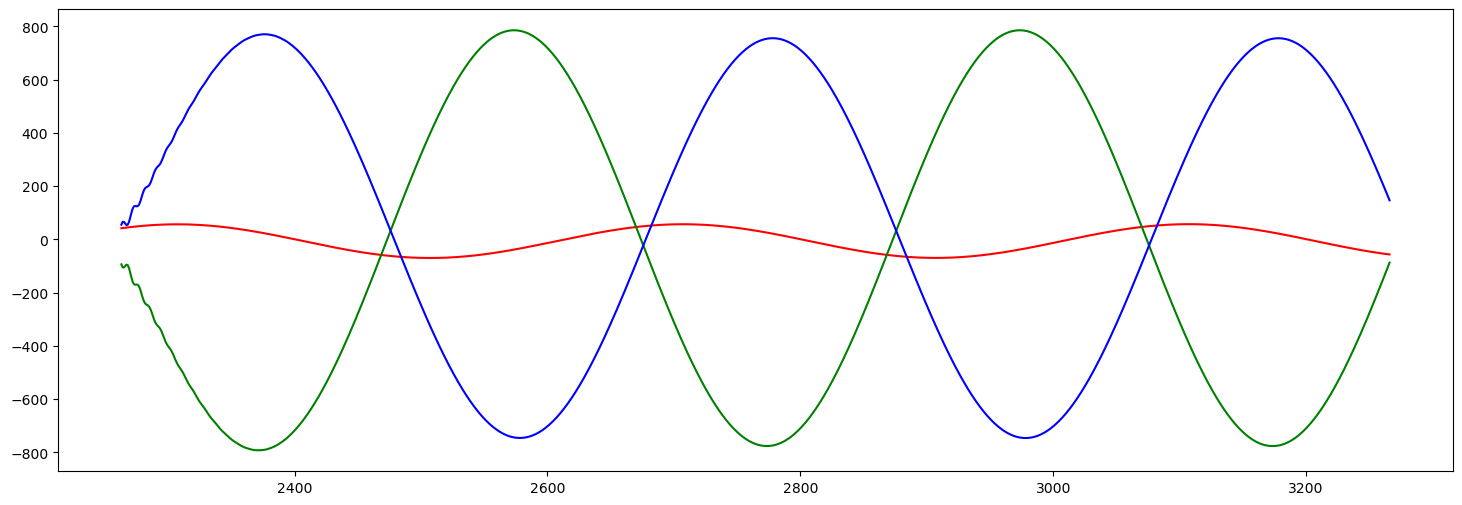

In [38]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_BC_Fault['Ia'], 'r')
ax = plt.plot(Line_BC_Fault['Ib'], 'g')
ax = plt.plot(Line_BC_Fault['Ic'], 'b')

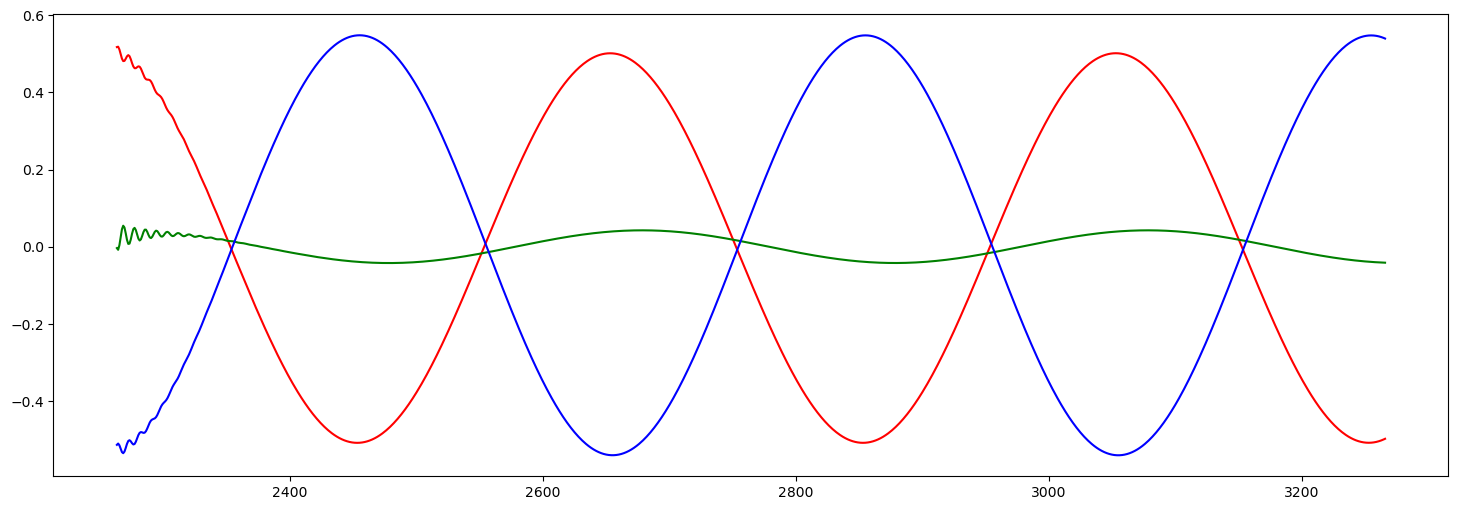

In [39]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_BC_Fault['Va'], 'r')
ax = plt.plot(Line_BC_Fault['Vb'], 'g')
ax = plt.plot(Line_BC_Fault['Vc'], 'b')

#### 5.Faulty System with Line A - Line B - Line C

In [40]:
Line_ABC_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C']

In [41]:
Line_ABC_Fault.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
3580,0,1,1,1,323.347160,551.461838,-872.682738,0.042108,-0.017050,-0.025058,Line A Line B Line C
3657,0,1,1,1,-654.842536,841.280186,-184.327065,0.010555,0.030260,-0.040815,Line A Line B Line C
3840,0,1,1,1,476.805191,-882.140430,407.409031,-0.021038,-0.021306,0.042345,Line A Line B Line C
3577,0,1,1,1,361.760335,518.296181,-877.929641,0.042280,-0.018859,-0.023421,Line A Line B Line C
3836,0,1,1,1,429.127700,-882.917619,455.864508,-0.023306,-0.018967,0.042273,Line A Line B Line C


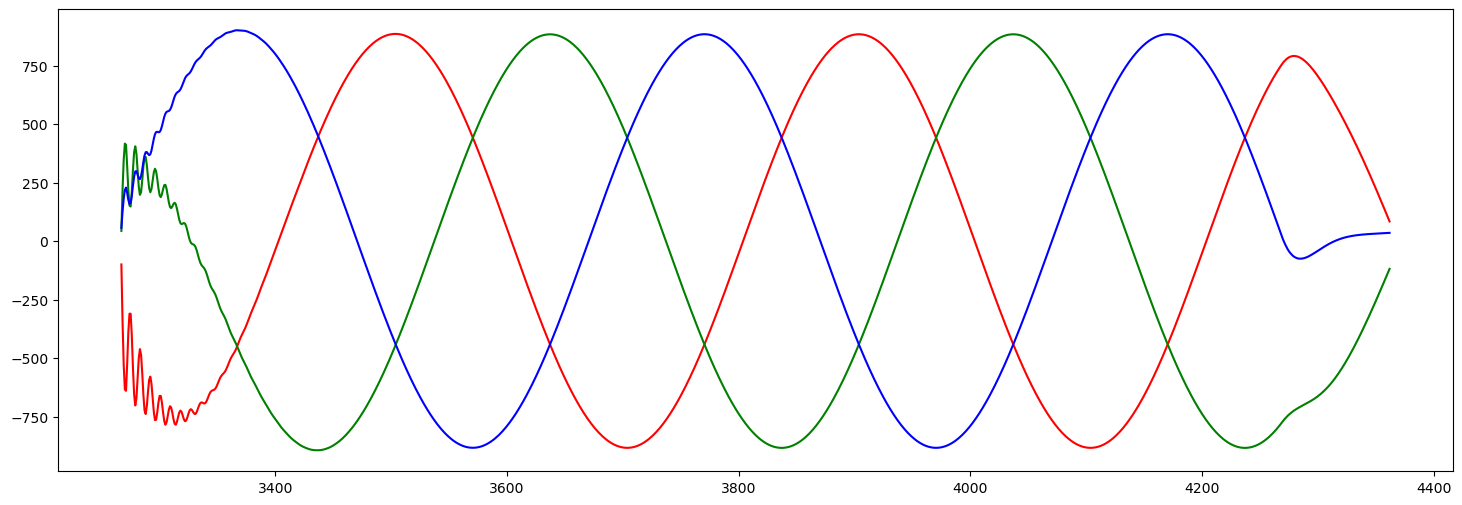

In [42]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_ABC_Fault['Ia'], 'r')
ax = plt.plot(Line_ABC_Fault['Ib'], 'g')
ax = plt.plot(Line_ABC_Fault['Ic'], 'b')

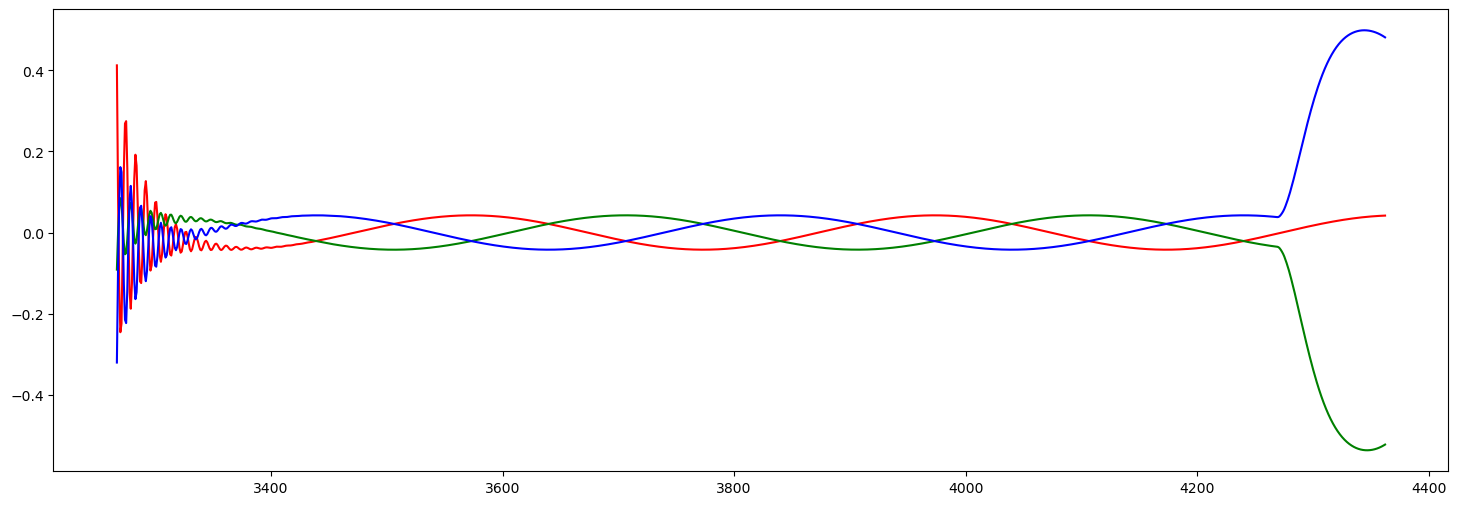

In [43]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_ABC_Fault['Va'], 'r')
ax = plt.plot(Line_ABC_Fault['Vb'], 'g')
ax = plt.plot(Line_ABC_Fault['Vc'], 'b')

#### 6. Faulty System with Line A - Line B - Line C - Ground

In [44]:
Line_ABCG_Fault = df_class[df_class['Fault_Type'] == 'Line A Line B Line C to Ground Fault']

In [45]:
Line_ABCG_Fault.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
4364,1,1,1,1,-342.238819,224.821345,119.149604,0.095347,-0.002326,-0.093021,Line A Line B Line C to Ground Fault
5440,1,1,1,1,709.502705,61.349598,22.280350,0.059720,-0.384811,0.325090,Line A Line B Line C to Ground Fault
5020,1,1,1,1,839.397345,-180.887932,-658.511677,0.030362,-0.040701,0.010339,Line A Line B Line C to Ground Fault
5351,1,1,1,1,636.723258,-849.151004,212.425482,-0.011881,-0.029243,0.041124,Line A Line B Line C to Ground Fault
4633,1,1,1,1,766.645673,-2.716927,-763.928257,0.035779,-0.037560,0.001781,Line A Line B Line C to Ground Fault


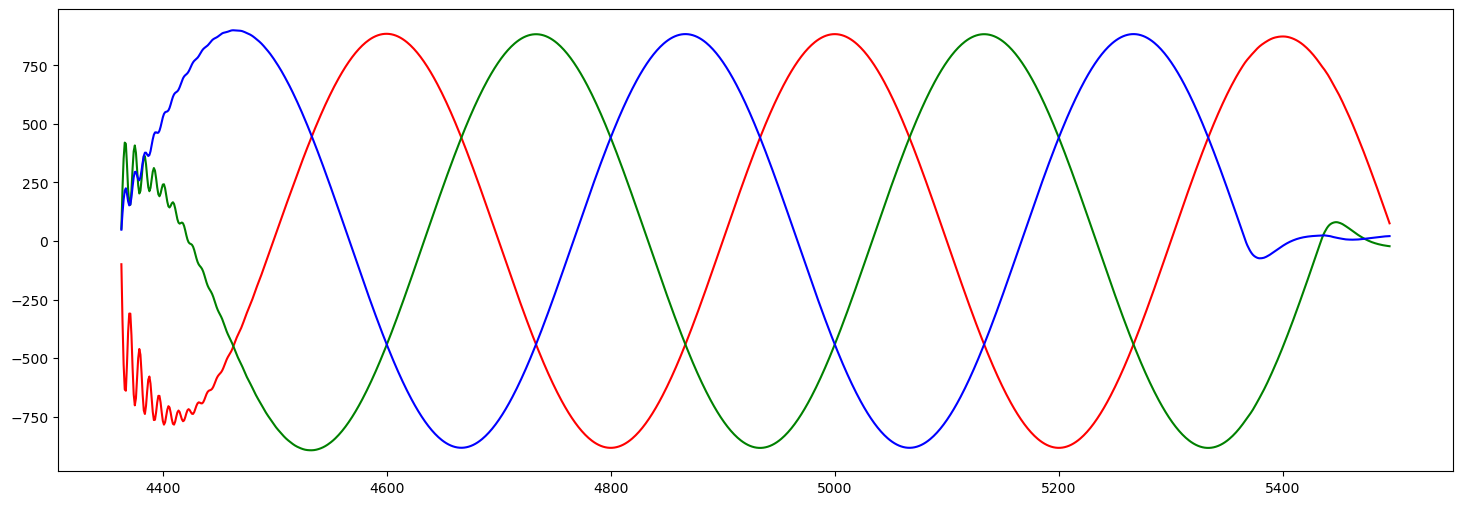

In [46]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_ABCG_Fault['Ia'], 'r')
ax = plt.plot(Line_ABCG_Fault['Ib'], 'g')
ax = plt.plot(Line_ABCG_Fault['Ic'], 'b')

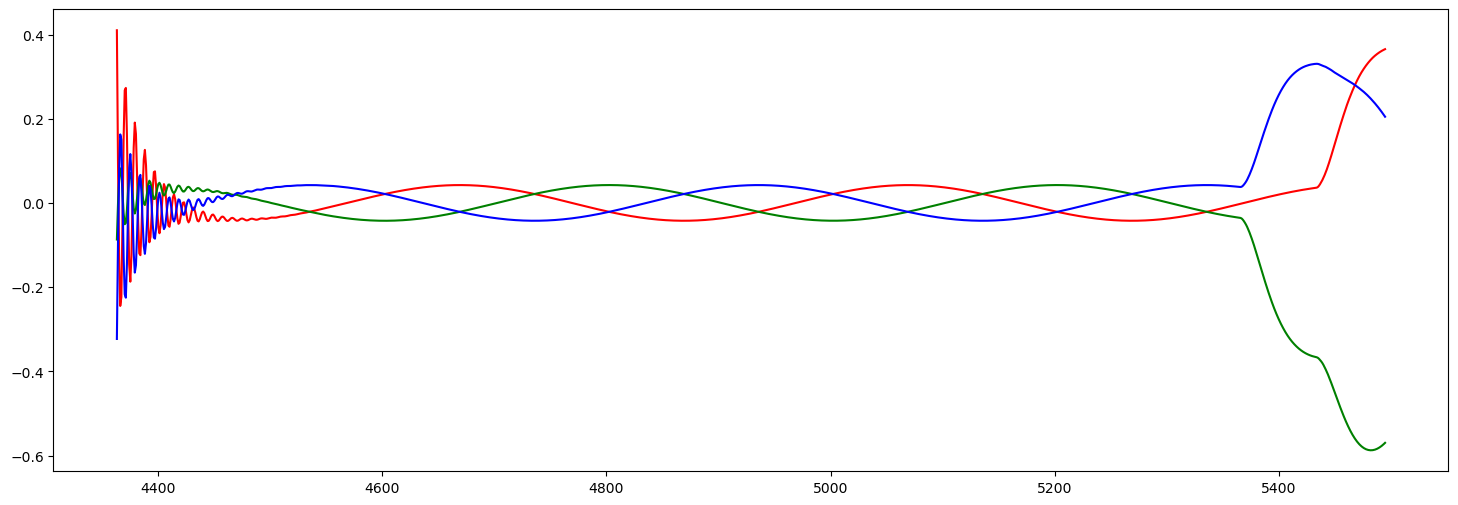

In [47]:
ax = plt.figure(figsize=(18,6))
ax = plt.plot(Line_ABCG_Fault['Va'], 'r')
ax = plt.plot(Line_ABCG_Fault['Vb'], 'g')
ax = plt.plot(Line_ABCG_Fault['Vc'], 'b')

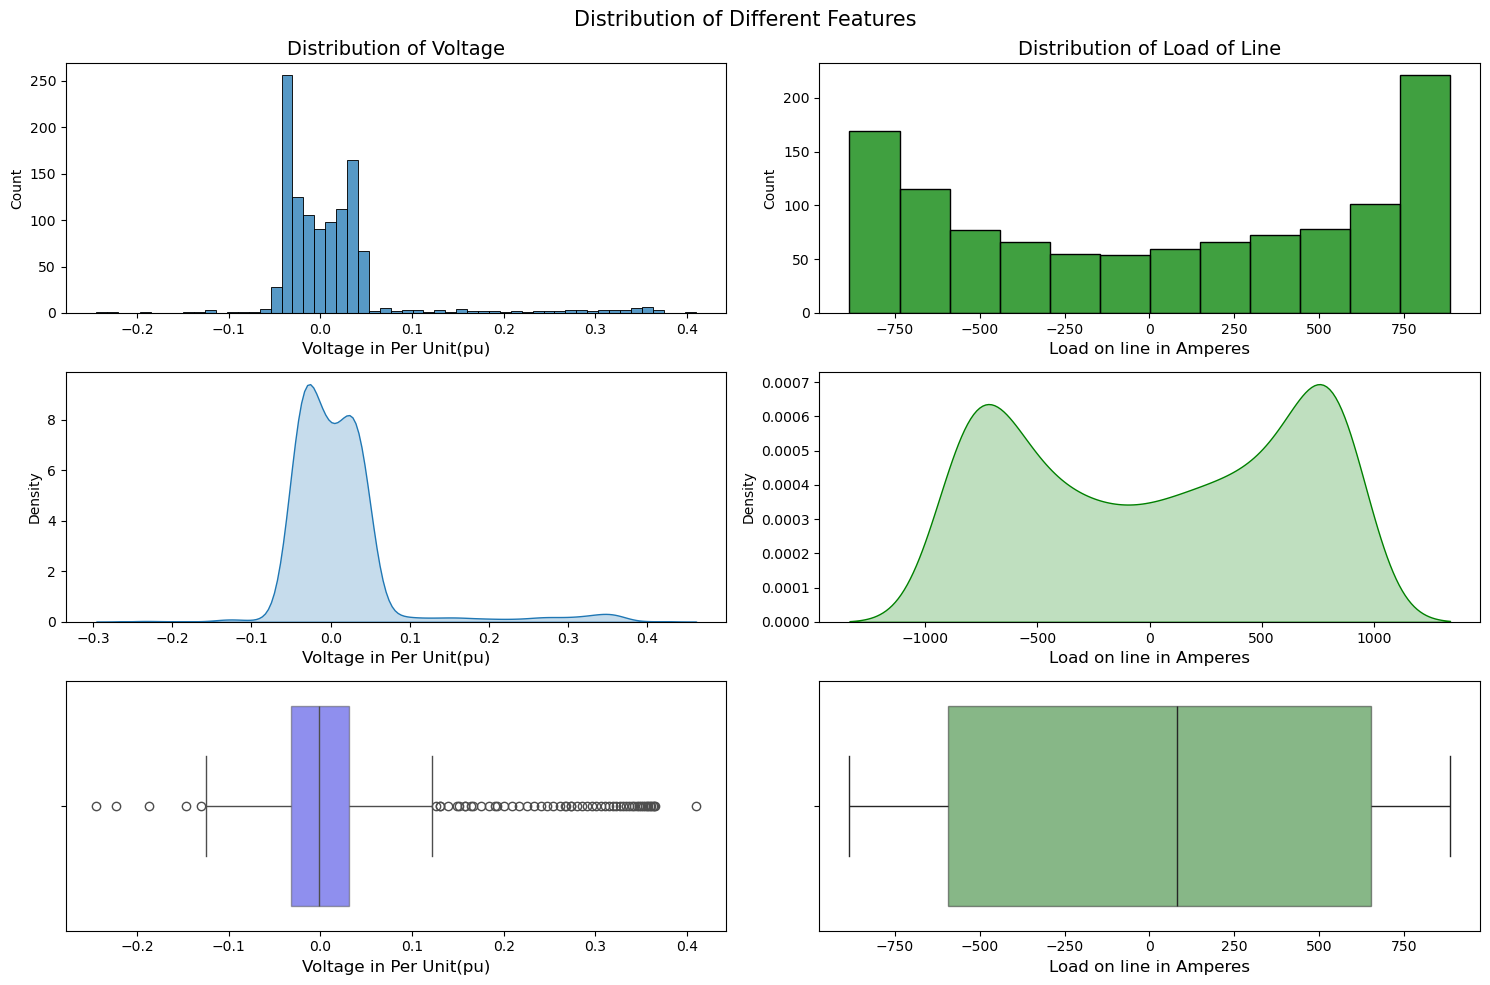

In [48]:
fig, axes = plt.subplots(3, 2, figsize=(15,10))
plt.suptitle("Distribution of Different Features", fontsize=15)

# Histograms
sns.histplot(Line_ABCG_Fault['Va'], kde=False, ax=axes[0, 0])
axes[0, 0].set_xlabel('Voltage in Per Unit(pu)', fontsize=12)
axes[0, 0].set_title('Distribution of Voltage', fontsize=14)

sns.histplot(Line_ABCG_Fault['Ia'], kde=False, color='green', ax=axes[0, 1])
axes[0, 1].set_xlabel('Load on line in Amperes', fontsize=12)
axes[0, 1].set_title('Distribution of Load of Line', fontsize=14)


# kde Plots
sns.kdeplot(Line_ABCG_Fault['Va'], fill=True, ax=axes[1,0])
axes[1, 0].set_xlabel('Voltage in Per Unit(pu)', fontsize=12)

sns.kdeplot(Line_ABCG_Fault['Ia'], fill=True, color='green', ax=axes[1,1])
axes[1, 1].set_xlabel('Load on line in Amperes', fontsize=12)


# Box Plots
sns.boxplot(x=Line_ABCG_Fault['Va'], orientation='v', color='b', boxprops=dict(alpha=.5), ax=axes[2,0])
axes[2, 0].set_xlabel('Voltage in Per Unit(pu)', fontsize=12)
sns.boxplot(x=Line_ABCG_Fault['Ia'], orientation='v', color='g', boxprops=dict(alpha=.5), ax=axes[2,1])
axes[2, 1].set_xlabel('Load on line in Amperes', fontsize=12)


plt.tight_layout()
plt.show()

#### Feature and Label Seperation

**Categorical to Numerical Conversion**

In [49]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_class['Fault_Type'] = encoder.fit_transform(df_class['Fault_Type'])
df_class.sample(5)

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,Fault_Type
7196,0,0,0,0,45.939123,-23.674896,-25.320714,0.407036,0.187277,-0.594314,5
7639,0,0,0,0,55.159857,6.126361,-64.215310,0.042269,0.513471,-0.555740,5
6366,0,0,0,0,24.306781,-28.651372,1.034315,0.558492,-0.093747,-0.464745,5
3288,0,1,1,1,-738.408639,360.067736,380.527666,-0.124761,0.058846,0.065916,0
6009,0,0,0,0,50.566503,-12.512740,-41.479414,0.308178,0.304110,-0.612287,5


**Dependent and Independent Variable Seperation**

In [50]:
X = df_class.drop(['Fault_Type'], axis=1)
y = df_class['Fault_Type']

**Train Test Split**

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [52]:
print(X_train.shape, X_test.shape)

(6288, 10) (1573, 10)


### Model Selection

### Logistic Regression

Training Accuracy :  100.0 %
Test Accuracy :  100.0 %
----------------------------------------
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00       226
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       473

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

----------------------------------------


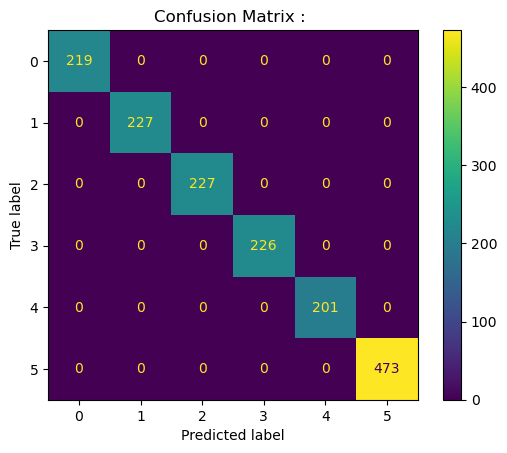

In [63]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay


pipe = Pipeline([
    ("scaler", StandardScaler()),
    ("logreg", LogisticRegression(max_iter=1000))
])

pipe.fit(X_train, y_train)
y_pred_lr = pipe.predict(X_test)

log_train = round(pipe.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_test, y_pred_lr) * 100, 2)

print("Training Accuracy : ", log_train, "%")
print("Test Accuracy : ", log_accuracy, "%")
print("----------------------------------------")
print("Classification Report : ")
print(classification_report(y_test, y_pred_lr))
print("----------------------------------------")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_lr)
plt.title("Confusion Matrix : ")
plt.show()

### Decision Tree Classifier

Training Accuracy     :  100.0 %
Model Accuracy Score  :  100.0 %
-------------------------------------------------
Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00       226
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       473

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573


 ------------------------------------------


Text(0.5, 1.0, 'Confusion Matrix')

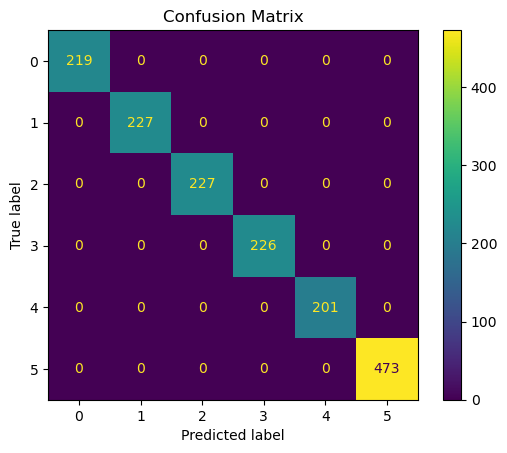

In [54]:
from sklearn.tree import DecisionTreeClassifier

decision = DecisionTreeClassifier(max_depth=100)
decision.fit(X_train, y_train)
y_pred_dec = decision.predict(X_test)

decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_dec, y_test) * 100, 2)

print("Training Accuracy     : ", decision_train, "%")
print("Model Accuracy Score  : ", decision_accuracy, "%")
print("-------------------------------------------------")
print("Classification Report : \n", classification_report(y_test, y_pred_dec))
print("\n ------------------------------------------")

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dec)
plt.title("Confusion Matrix")

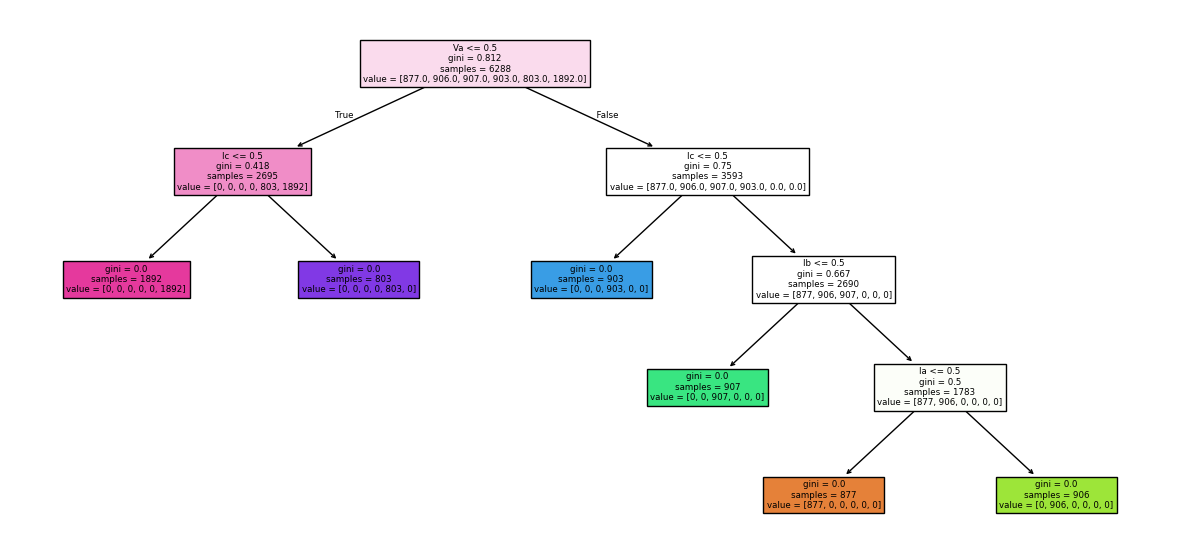

In [55]:
from sklearn.tree import plot_tree
plt.figure(figsize=(15,7))
plot_tree(decision,filled=True,feature_names=['Ia', 'Ib', 'Ic', 'Va', 'Vb', 'Vc'])
plt.show()

In [56]:
from sklearn import tree
def tree_plot(model_name):
    plt.figure(figsize=(20,20))
    features = df_class.columns
    classes = ['NO Fault','Line A to Ground Fault','Line B to Line C Fault','Line A Line B to Ground Fault','Line A Line B Line C','Line A Line B Line C to Ground Fault']
    tree.plot_tree(model_name,feature_names=features,class_names=classes,filled=True)
    plt.show()

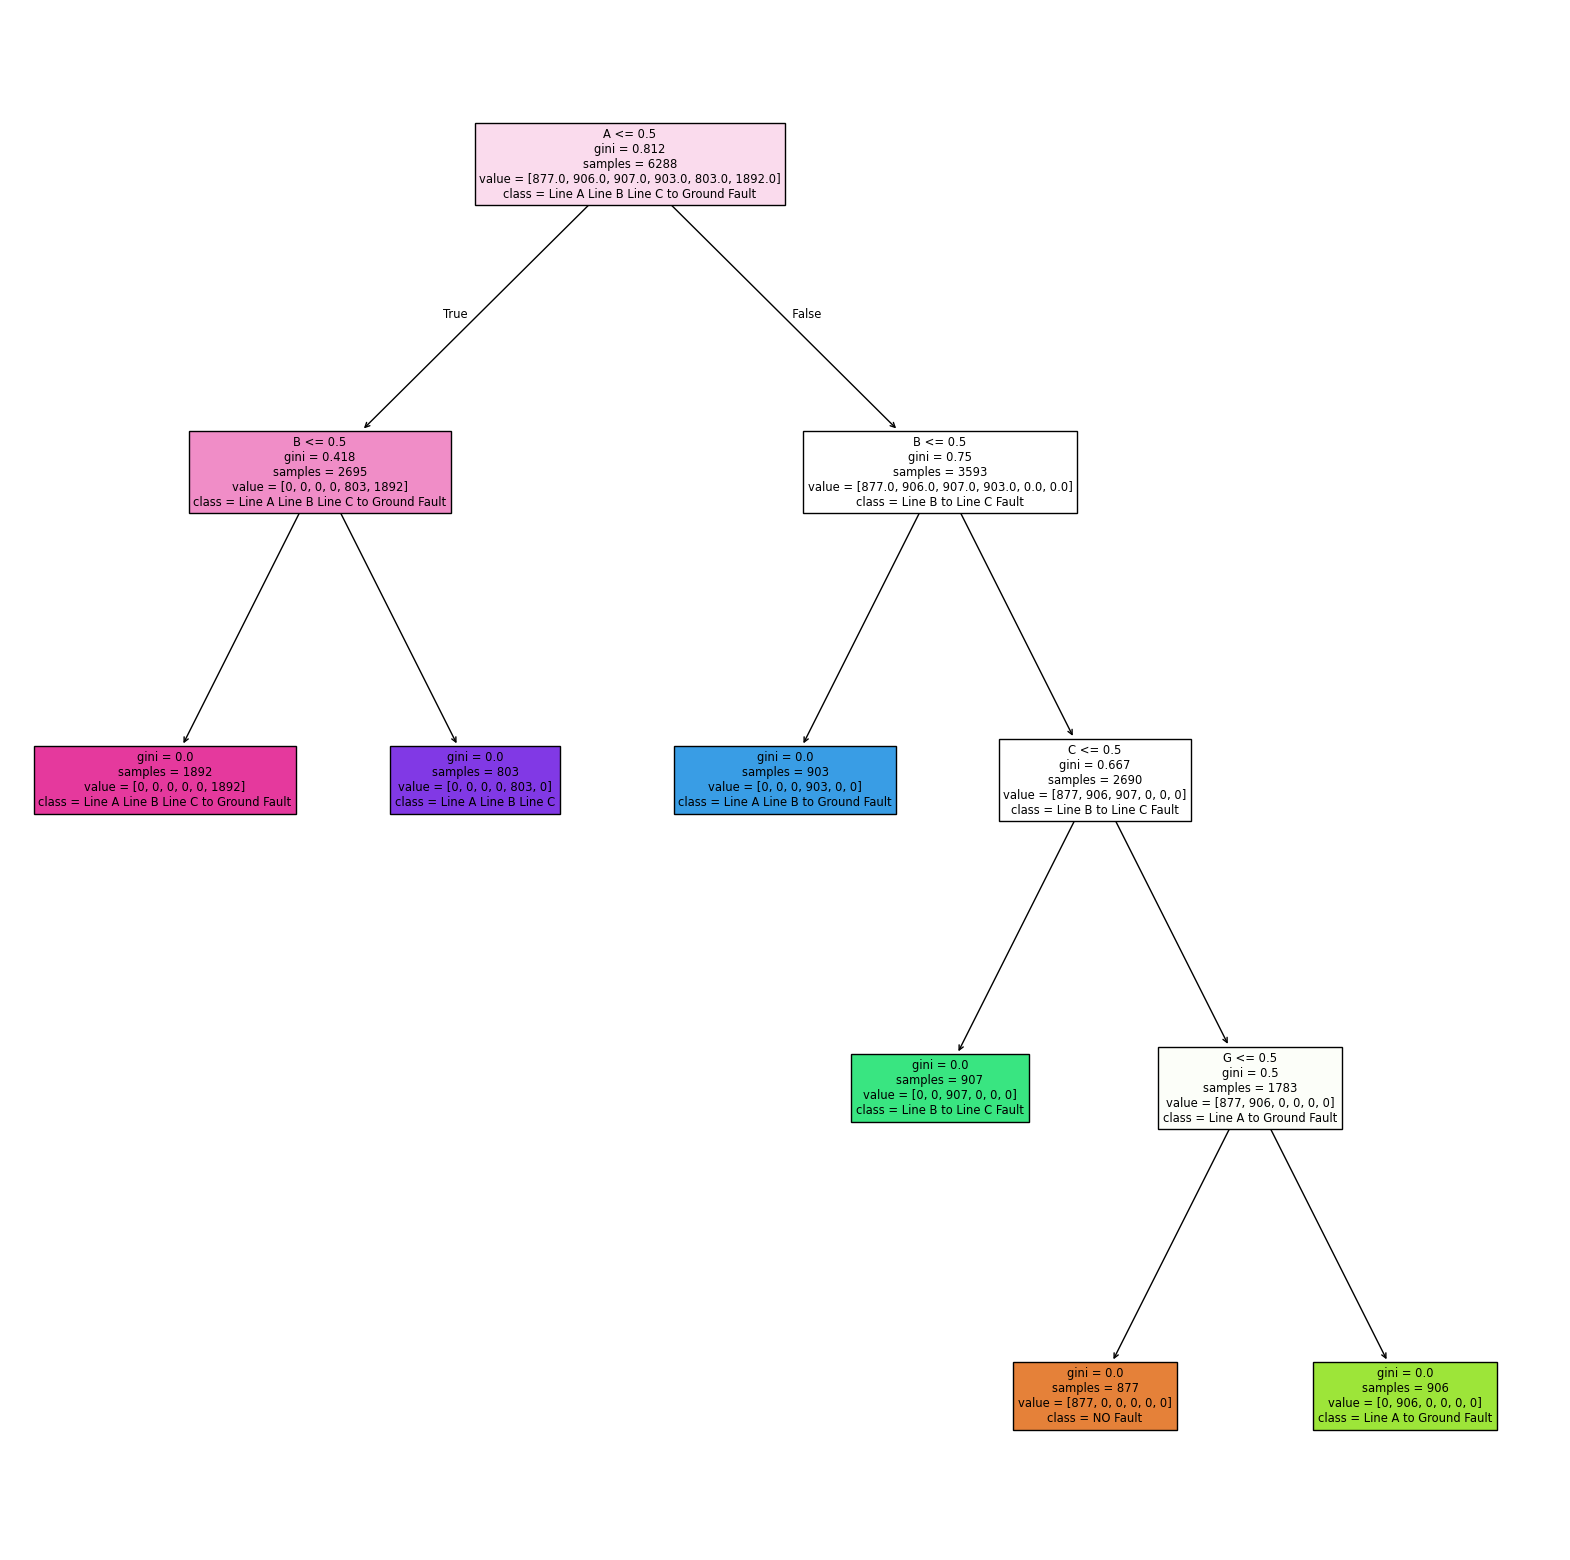

In [57]:
tree_plot(decision)

### Random Forest Classifier

Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00       226
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       473

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


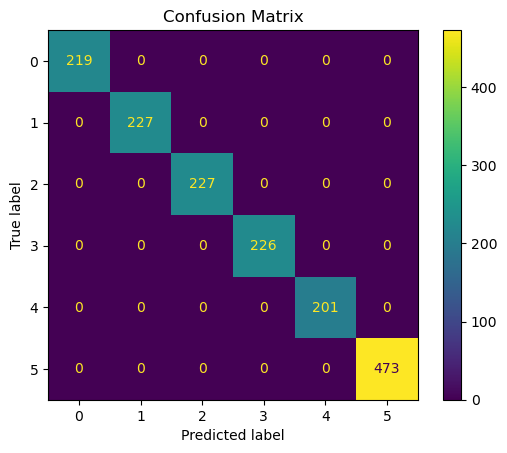

In [58]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
y_pred_rf = random_forest.predict(X_test)
random_forest.score(X_train, y_train)

random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_rf, y_test) * 100, 2)

print("Training Accuracy    :",random_forest_train ,"%")
print("Model Accuracy Score :",random_forest_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_rf))
print("\033[1m--------------------------------------------------------\033[0m")


ConfusionMatrixDisplay.from_predictions(y_test, y_pred_rf)
plt.title('Confusion Matrix');

### XGB Classifier

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.
Training Accuracy    : 100.0 %
Model Accuracy Score : 100.0 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       219
           1       1.00      1.00      1.00       227
           2       1.00      1.00      1.00       227
           3       1.00      1.00      1.00       226
           4       1.00      1.00      1.00       201
           5       1.00      1.00      1.00       473

    accuracy                           1.00      1573
   macro avg       1.00      1.00      1.00      1573
weighted avg       1.00      1.00      1.00      1573

--------------------------------------------------------


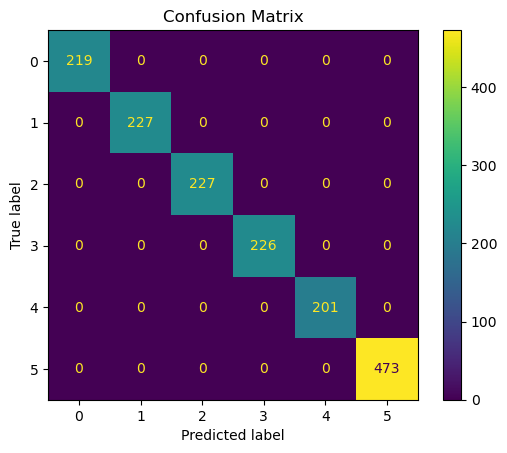

In [59]:
%pip install xgboost --break-system-packages
import xgboost as Xgb
xgb = Xgb.XGBClassifier()
xgb.fit(X_train,y_train)
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy    :",xgb_train ,"%")
print("Model Accuracy Score :",xgb_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_xgb);
plt.title('Confusion Matrix');

### Support Vector Machines

Training Accuracy    : 76.45 %
Model Accuracy Score : 74.19 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.49      0.51      0.50       219
           1       0.42      0.15      0.22       227
           2       0.72      0.78      0.75       227
           3       0.74      0.84      0.79       226
           4       0.78      0.91      0.84       201
           5       0.89      1.00      0.94       473

    accuracy                           0.74      1573
   macro avg       0.67      0.70      0.67      1573
weighted avg       0.71      0.74      0.71      1573

--------------------------------------------------------


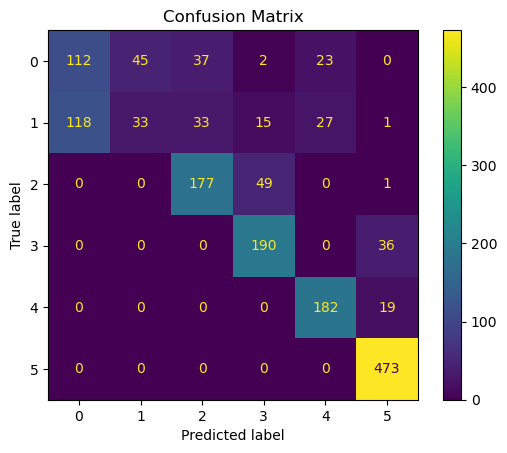

In [69]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(X_train, y_train)
y_pred_svc = svc.predict(X_test)

svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)

print("Training Accuracy    :",svc_train ,"%")
print("Model Accuracy Score :",svc_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_svc))
print("\033[1m--------------------------------------------------------\033[0m")
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_svc);
plt.title('Confusion Matrix');

# final mmodel
final_model = svc.fit(X_train, y_train)

#### Comparing Different Models

In [64]:
models = pd.DataFrame({
    'Model': [
        'Support Vector Machines', 'Logistic Regression', 'Random Forest', 'Decision Tree', 'XGBClassifier'
    ],

    'Training Accuracy': [
        log_train, svc_train, decision_train, random_forest_train, xgb_train
    ],

    'Model Accuracy Score': [
        log_accuracy, svc_accuracy, decision_accuracy, random_forest_accuracy, xgb_accuracy
    ]
})

In [68]:
pd.set_option('display.precision', 2)
models.sort_values(by='Model Accuracy Score', ascending=False)

,Model,Training Accuracy,Model Accuracy Score
0,Support Vector Machines,100.00,100.00
2,Random Forest,100.00,100.00
3,Decision Tree,100.00,100.00
4,XGBClassifier,100.00,100.00
1,Logistic Regression,76.45,74.19
